<a href="https://colab.research.google.com/github/lukmanaj/medium-blog-codes/blob/main/logistic_regression_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
# Load the breast cancer dataset
X,y = load_breast_cancer(return_X_y = True)



In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [ ]:
X_test_scaled

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [ ]:
X_train_scaled.shape

(455, 30)

In [ ]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data, to test the model
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test,y_pred)
print(f'accuracy score: {accuracy}')
print(f'classifcation report : \n  {classification_report}')


accuracy score: 0.9736842105263158
classifcation report : 
                precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
cm  = confusion_matrix(y_test,y_pred)
cm

array([[41,  2],
       [ 1, 70]])

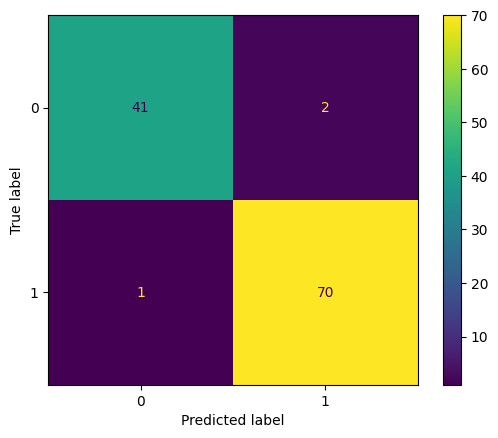

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=model.classes_)
disp.plot()
plt.show()